In [12]:
!pip install numpy matplotlib


In [13]:
import os
print(os.getcwd())


/home/hzhou53/2024 Fall DNA and GIN model


Running with Non-Simplified Strategy (All Bins):


--- Randomly Selected Bin Arrays ---
Fragment 9475: Bins = [13526, 13527, 28091, 28092, 30133, 30134]
Fragment 19530: Bins = [26878, 26879, 28422, 28423, 29556, 29557]
Fragment 623: Bins = [17947, 17948, 34049, 34050, 34051, 34052, 34053, 34054, 34121, 34122]
Fragment 4443: Bins = [5874, 5875, 5876, 5908, 5909, 32983, 32984, 32985]
Fragment 34429: Bins = [3956, 3957, 11596, 11597, 31413, 31414, 31415]
Fragment 21574: Bins = [25571, 25572, 25599, 25600, 33514, 33515, 33516]
Fragment 15932: Bins = [1257, 1258, 5752, 5753, 6445, 6446]
Fragment 5114: Bins = [17919, 17920, 17921, 17933, 17934, 17949, 17950, 17951]
Fragment 24396: Bins = [51183, 51184, 51203, 51204, 51217, 51218, 51219, 51220]
Fragment 12275: Bins = [12852, 12853, 12969, 12970, 12971, 13085, 13086, 13087]


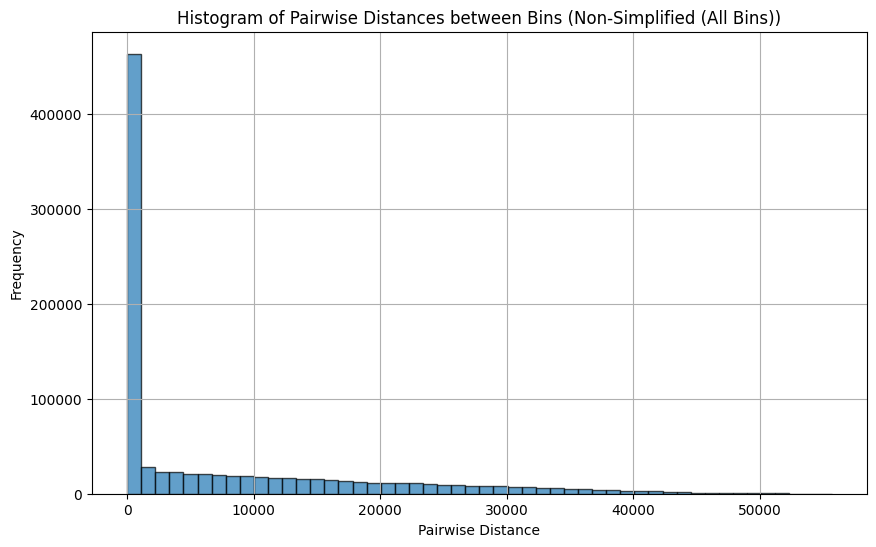


Total number of pairwise distances calculated: 919343

--- Frequencies for Distances 1 to 20 ---
Distance 1: 165071
Distance 2: 49910
Distance 3: 9860
Distance 4: 5058
Distance 5: 2853
Distance 6: 2112
Distance 7: 2790
Distance 8: 4159
Distance 9: 4881
Distance 10: 4844
Distance 11: 4533
Distance 12: 4218
Distance 13: 3990
Distance 14: 3771
Distance 15: 3547
Distance 16: 3381
Distance 17: 3305
Distance 18: 3251
Distance 19: 3142
Distance 20: 2983

--- Frequencies for Longest 5 Distances ---
Distance 55635: 2
Distance 55636: 1
Distance 55676: 1
Distance 55677: 2
Distance 55678: 1

Running with Simplified Strategy (Mid Bin Only):


--- Randomly Selected Bin Arrays ---
Fragment 22198: Bins = [490, 1088, 15251]
Fragment 19365: Bins = [6805, 31641, 43641]
Fragment 20347: Bins = [1676, 21304, 31180]
Fragment 25647: Bins = [9339, 17383, 29619]
Fragment 31423: Bins = [37015, 39180, 39246]
Fragment 26145: Bins = [9755, 12318, 42520]
Fragment 19817: Bins = [16150, 22577, 44658]
Fragment 21253: 

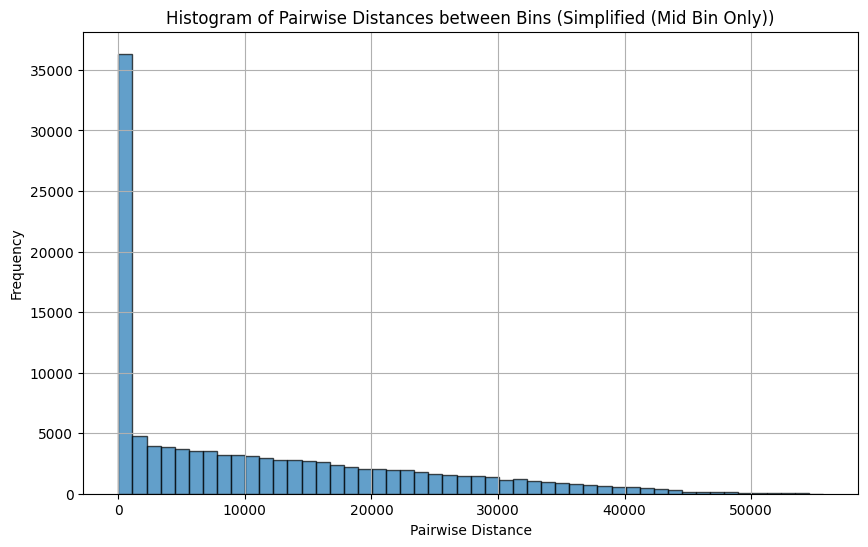


Total number of pairwise distances calculated: 115161

--- Frequencies for Distances 1 to 20 ---
Distance 1: 0
Distance 2: 0
Distance 3: 0
Distance 4: 0
Distance 5: 0
Distance 6: 0
Distance 7: 203
Distance 8: 783
Distance 9: 812
Distance 10: 787
Distance 11: 721
Distance 12: 647
Distance 13: 606
Distance 14: 561
Distance 15: 561
Distance 16: 506
Distance 17: 513
Distance 18: 505
Distance 19: 487
Distance 20: 462

--- Frequencies for Longest 5 Distances ---
Distance 54966: 1
Distance 55032: 1
Distance 55267: 1
Distance 55635: 1
Distance 55677: 1


In [19]:
import re
import itertools
import numpy as np
import matplotlib.pyplot as plt
import random

def read_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            if "PASS" not in line:
                continue
            match = re.search(r'chr\w+:(\d+-\d+);chr\w+:(\d+-\d+);chr\w+:(\d+-\d+)', line)
            if match:
                fragments = match.group(0).split(';')
                data.append(fragments)
    return data

def convert_to_bins_all(fragments, bin_size=500):
    bins = []
    for fragment in fragments:
        chrom, coords = fragment.split(':')
        start, end = map(int, coords.split('-'))
        bin_start = int(start / bin_size) + 1
        bin_end = int(end / bin_size) + 1
        bins.extend(range(bin_start, bin_end + 1))
    return bins

def convert_to_bins_mid(fragments, bin_size=500):
    bins = []
    for fragment in fragments:
        chrom, coords = fragment.split(':')
        start, end = map(int, coords.split('-'))
        bin_start = int(start / bin_size) + 1
        bin_end = int(end / bin_size) + 1
        mid_bin = (bin_start + bin_end) // 2
        bins.append(mid_bin)
    return bins

def calculate_pairwise_distances(bins_list):
    all_distances = []
    for bins in bins_list:
        for bin1, bin2 in itertools.combinations(bins, 2):
            distance = abs(bin1 - bin2)
            all_distances.append(distance)
    return all_distances

def plot_histogram(distances, title):
    plt.figure(figsize=(10, 6))
    plt.hist(distances, bins=50, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of Pairwise Distances between Bins ({title})')
    plt.xlabel('Pairwise Distance')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

def print_selected_distance_frequencies(distances):
    unique_distances, counts = np.unique(distances, return_counts=True)
    
    print("\n--- Frequencies for Distances 1 to 20 ---")
    for i in range(1, 21):
        if i in unique_distances:
            index = np.where(unique_distances == i)[0][0]
            print(f"Distance {i}: {counts[index]}")
        else:
            print(f"Distance {i}: 0")
    

    print("\n--- Frequencies for Longest 5 Distances ---")
    longest_5_indices = np.argsort(unique_distances)[-5:]  
    for idx in longest_5_indices:
        print(f"Distance {unique_distances[idx]}: {counts[idx]}")

def main(file_path, simplify=False):
    data = read_data(file_path)
    
    if simplify:
        all_bins = [convert_to_bins_mid(fragments) for fragments in data]
        strategy = "Simplified (Mid Bin Only)"
    else:
        all_bins = [convert_to_bins_all(fragments) for fragments in data]
        strategy = "Non-Simplified (All Bins)"
    
    distances = calculate_pairwise_distances(all_bins)
    
    random_indices = random.sample(range(len(all_bins)), 10)
    print("\n--- Randomly Selected Bin Arrays ---")
    for idx in random_indices:
        print(f"Fragment {idx + 1}: Bins = {all_bins[idx]}")
    
    plot_histogram(distances, strategy)
    
    print(f"\nTotal number of pairwise distances calculated: {len(distances)}")
    
    print_selected_distance_frequencies(distances)

if __name__ == "__main__":
    file_path = '/home/hzhou53/2024 Fall DNA and GIN model/GSM3347525NR_FDR_0.1_pseudoGEM_10000_enrichTest_master.txt'
    #Use your actual file path
    
    print("Running with Non-Simplified Strategy (All Bins):\n")
    main(file_path, simplify=False)
    
    print("\nRunning with Simplified Strategy (Mid Bin Only):\n")
    main(file_path, simplify=True)

